In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as op

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('winequality-red.csv', sep = ';')

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
# 1 in 'quality' column indicates wine quality is Low
# 2 in 'quality' column indicates wine quality is Avarage
# 3 in 'quality' column indicates wine quality is Good

a = df['quality'][(df['quality'] <= 4) & (df['quality'] >= 3)]
df.loc[a.index, 'quality'] = 1

a = df['quality'][(df['quality'] <= 6) & (df['quality'] >= 5)]
df.loc[a.index, 'quality'] = 2

a = df['quality'][(df['quality'] <= 8) & (df['quality'] >= 7)]
df.loc[a.index, 'quality'] = 3

In [6]:
df['quality'].unique()

array([2, 3, 1])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,2.096310
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,2.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,2.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,3.000000


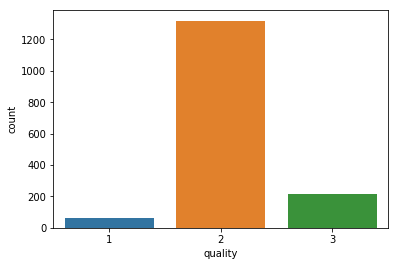

In [9]:
sns.countplot(x = 'quality', data = df)

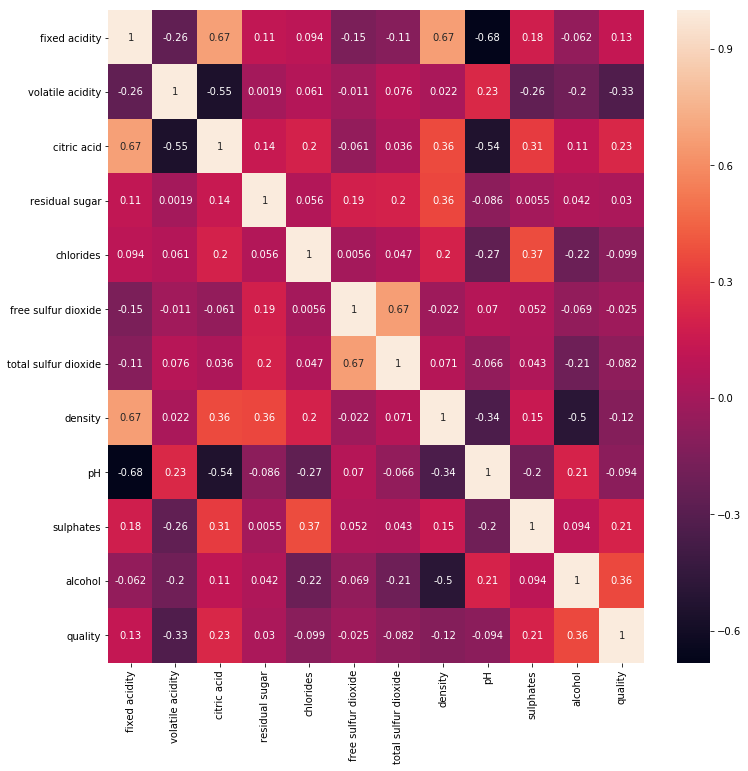

In [10]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot= True)

In [11]:
df.corr()['quality']

fixed acidity           0.125886
volatile acidity       -0.333816
citric acid             0.228930
residual sugar          0.030153
chlorides              -0.098829
free sulfur dioxide    -0.025075
total sulfur dioxide   -0.081960
density                -0.123566
pH                     -0.093946
sulphates               0.205409
alcohol                 0.361363
quality                 1.000000
Name: quality, dtype: float64

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 72)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
def sigmoid(z):
    g = np.exp(-z)
    g = 1 + g
    g = 1 / g
    return g

In [17]:
def costFunction(theta, X, y):
    
    (m , n) = X.shape
    
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
       + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    
    return J

In [18]:
def Gradient(theta, X, y):
    
    (m , n) = X.shape

    grad = np.zeros((theta.shape[0], 1))
    
    grad[0] = (np.sum(sigmoid(np.dot(X,theta)) - y)) / m
    
    for i in range(1, n):
        grad[i] = (np.sum((sigmoid(np.dot(X,theta)) - y) * X[:,i])) / m
    
    return grad

In [19]:
def multiclass(X, y):
               
    (m , n) = X.shape
    X = np.append(np.ones((m, 1)), X, axis = 1)
    alltheta = np.zeros((3, n+1))
    initial_theta = np.zeros((n + 1, 1))
               
    for i in range(1, 4) :
        Result = op.minimize(fun = costFunction, 
                                 x0 = initial_theta, 
                                 args = (X, (y==i).astype(int)),
                                 method = 'TNC',
                                 jac = Gradient);
        alltheta[i - 1, :] = Result.x
               
    return alltheta

In [20]:
def predict(alltheta, X):
    
    m, n = X.shape
    X = np.append(np.ones((m, 1)), X, axis = 1)
    pred = np.zeros((m, 1))
    
    for i in range(0, m):
        row = X[i, :]
        row = row[np.newaxis].T
        q = sigmoid(np.dot(alltheta, row))
        pred[i] = np.argmax(q) + 1

    return pred


In [21]:
alltheta = multiclass(X_train, y_train)

In [22]:
pred = predict(alltheta, X_test)
accuracy = np.mean((pred == np.reshape(np.array([y_test]), pred.shape)).astype(int)) * 100

In [23]:
accuracy

83.125

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
confusion_matrix(y_test, pred)

array([[  1,   9,   0],
       [  0, 253,  10],
       [  0,  35,  12]])

In [27]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       1.00      0.10      0.18        10
          2       0.85      0.96      0.90       263
          3       0.55      0.26      0.35        47

avg / total       0.81      0.83      0.80       320

